# Homework 3: Logistics Regression
Implement everywhere that has an ellipsis (`...`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X, Y = data.data, data.target

In [3]:
# only classify class 1 vs. class 2
X = X[50:]
Y = Y[50:].reshape(-1, 1)

### Data normalization
Remember: normalization is done per feature, not all at once. Also, remember that Y is [1, 2] instead of [0, 1].

In [4]:
# Add bias
X = np.hstack((np.ones((X.shape[0],1)), X))

# Z-score normalization 
for i in range(1, 5):
    T = X[:, i]
    X[:, i] = (T - T.mean()) / T.std()

# Label: Y[1, 2] -> Y[0, 1]
Y = Y - 1

### Define classification model
Create parameters here. Initialize with zeros. In case you forgot: $Y = \sigma(X\Theta)$.

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_loss(X, Y, weight):
    Y_pred = 1 / (1 + np.exp(-X @ weight))
    loss = -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / Y.size
    return loss

def gradient_descent(X, Y, learning_rate, epochs):
    """
    Input:
        X:      (100, 5)
        Y:      (100, 1)
    Output: 
        weigth: (5, 1)
        loss
    """
    loss = []
    weight = np.zeros((X.shape[1], 1))
    N = Y.size
    
    for i in range(epochs):
        loss.append(compute_loss(X, Y, weight))
        weight -= learning_rate / N * (X.T @ (sigmoid(X @ weight) - Y))
    return weight, loss

### Define evaluation metrics

In [6]:
def accuracy(X, Y, weight):
    '''
    Evaluate the model, represented by `weight`, with data (X, Y).
    
    Input:
        X:      data features
        Y:      data labels
        weight: model weights
    Ouput:
        Model accuracy on input data.
    '''
    Y_pred = sigmoid(X @ weight)
    Y_pred = np.array([1 if i > 0.5 else 0 for i in Y_pred]).reshape(-1, 1)
    return np.sum(Y_pred == Y) / len(Y)

### Hyperparameters

In [7]:
# learning rate
alpha = 1e-2
# epochs
epoch = 10000

### Train the model

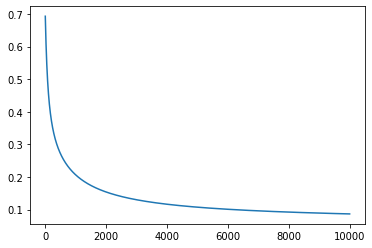

In [8]:
weight, loss = gradient_descent(X, Y, alpha, epoch)

plt.plot(loss)

In [9]:
# just to double check
assert np.allclose(weight.reshape(1, -1), np.array([0.12047504, -0.44156746, -0.89309501, 2.965364, 3.3427994]))

In [10]:
# model accuracy
print('Weights:', weight.reshape(1, -1)[0])
print('Loss:', compute_loss(X, Y, weight))
print('Accuracy:', accuracy(X, Y, weight))

Weights: [ 0.12047504 -0.44156746 -0.89309501  2.965364    3.3427994 ]
Loss: 0.08662719407135402
Accuracy: 0.96


In [11]:
# do some fun code here and try to match this :)
def GD_momentum(X, Y, learning_rate, epochs, gamma=0.1):
    """
    Input:
        X:      (100, 5)
        Y:      (100, 1)
    Output: 
        weigth: (5, 1)
        loss
    """
    loss = []
    weight = np.zeros((X.shape[1], 1))
    N = Y.size
    v_old = np.zeros_like(weight)
    
    for i in range(epochs):
        loss.append(compute_loss(X, Y, weight))
        v_new = learning_rate / N * (X.T @ (sigmoid(X @ weight) - Y)) + gamma*v_old
        weight -= v_new
        v_old = v_new
        
    return weight, loss

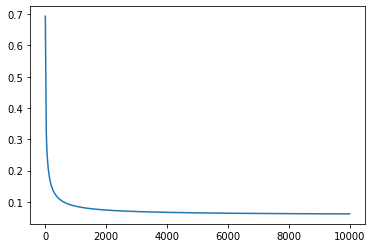

In [12]:
weight, loss = GD_momentum(X, Y, alpha, epoch, gamma=0.9)

plt.plot(loss)

In [13]:
print('Weights:', weight.reshape(1, -1)[0])
print('Loss:', compute_loss(X, Y, weight))
print('Accuracy:', accuracy(X, Y, weight))

Weights: [-0.16187077 -1.34860389 -1.62897597  5.86455274  5.79730362]
Loss: 0.06162407350931147
Accuracy: 0.98
